# Importing Libraries and Data

<font color='blue'>Cell 1
Importing libraries

In [ ]:
## Upload data from Module 3 data folder: 

# data1.csv 

# Note, make sure not to upload the data1.csv from Module 2

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<font color='blue'>Cell 2
Reading the data

In [19]:
#read data from csv
iris = pd.read_csv("Data/IrisData1.csv")
iris.head()


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<font color='blue'>Cell 3
Dataset verification

In [20]:
#Check the dataset to make sure no data is missing and Check the class labels
def verify_dataset(data):
  #if any of the rows have missing value return datas missing
  data_found = 1
  for each_column in data.columns:
    if data[each_column].isnull().any():
            print("Data missing in Column " + each_column)
            #if any rows are not missing return Dataset is complete. No missing value
            quit()
    if data_found == 1:
        print("Dataset is complete. No missing values")
    return

verify_dataset(iris)

Dataset is complete. No missing values


<font color='blue'>Cell 4
One hot encoding function

In [21]:
#This function accepts an array of categorical variables and returns the one hot encoding
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized


<font color='blue'>Cell 5
Data normalization function

In [22]:
#Normalize array
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

<font color='blue'>Cell 6
Activation function definitions

In [23]:
#sigmoid and its derivative
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

def user_softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

<font color='blue'>Cell 7
Selecting features from a list

In [7]:
'''Change the values below'''
sepal_length = True
sepal_width = True
petal_length = True
petal_width = True
'''Change the values above'''

feature_list = [sepal_length,sepal_width,petal_length,petal_width]

<font color='blue'>Cell 8
Selecting features and running the normalization function

In [24]:
#Specifying the input data "x"
columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
x = pd.DataFrame(iris, columns=columns)
x = x.to_numpy()
x = x[:,feature_list]
x = normalize(x)

<font color='blue'>Cell 9
Labelling output data and applying one hot encoding

In [25]:
#Replace the species with 1,2 or 3 as appropriate
label_dict = dict()
label_dict['0'] = 'setosa'
label_dict['1'] = 'virginica'
label_dict['2'] = 'versicolor'
iris['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

#Get Output, flatten and encode to one-hot
columns = ['Species']

y = pd.DataFrame(iris, columns=columns)
y = y.to_numpy()
y = y.flatten()
y = to_one_hot(y)


<font color='blue'>Cell 10
Train test splitting

In [26]:
x_y = pd.DataFrame(np.concatenate((x,y), axis=1))
def split_dataset_test_train(data,train_size):
  data = data.sample(frac=1).reset_index(drop=True)
  training_data = data.iloc[:int(train_size * len(data))].reset_index(drop=True)
  testing_data = data.iloc[int(train_size * len(data)):].reset_index(drop=True)
  return [training_data, testing_data]

train_test_data = split_dataset_test_train(x_y,0.7)
X_train = train_test_data[0].iloc[:,0:4].to_numpy()
X_test = train_test_data[1].iloc[:,0:4].to_numpy()

y_train = train_test_data[0].iloc[:,-3:].to_numpy()
y_test = train_test_data[1].iloc[:,-3:].to_numpy()

<font color='blue'>Cell 11
Training function definition

In [27]:
def training(lr, batch_size, hidden_size, epochs):

  w0 = 2*np.random.random((X_train.shape[1], hidden_size)) - 1 
  w1 = 2*np.random.random((hidden_size, 3)) - 1 

  bh = np.random.randn(hidden_size)
  bo = np.random.randn(3)


  rem = len(X_train) % batch_size
  num_batch = len(X_train)//batch_size
  if rem != 0:
    num_batch += 1

  #Errors - for graph later
  errors = []

  for epoch in range(epochs):
    for curr_batch in range(num_batch):
        # Finding the current batch
        batch_start = curr_batch * batch_size
        batch_end = batch_start + batch_size
        input_batch = X_train[batch_start:batch_end]
        
        # First layer propagation
        zh = np.dot(input_batch, w0) + bh
        layer1 = sigmoid(zh)

        # Second layer propagation
        zo = np.dot(layer1, w1) + bo
        layer2 = user_softmax(zo)

    ########## Back Propagation

    ########## Phase 1
        labels_batch = y_train[batch_start:batch_end]
        layer2_error = layer2 - labels_batch
        layer2w_delta = np.dot(layer1.T, layer2_error)

        layer2b_delta = layer2_error

    ########## Phases 2

        dcost_dah = np.dot(layer2_error , w1.T)
        dah_dzh = sigmoid_deriv(zh)
        
        layer1_error = dah_dzh * dcost_dah
        layer1w_delta = np.dot(input_batch.T, layer1_error)

        layer1b_delta = layer1_error

        # Update Weights ================

        w0 -= lr * layer1w_delta
        bh -= lr * layer1b_delta.sum(axis=0)

        w1 -= lr * layer2w_delta
        bo -= lr * layer2b_delta.sum(axis=0)

    error = np.mean(np.abs(layer2_error))
    errors.append(error)

  return [w0,bh,w1,bo], error, errors

<font color='blue'>Cell 12
Evaluation function definition

In [28]:
def evaluation(params,tst_set):
  w0 = params[0]
  bh = params[1]
  w1 = params[2]
  bo = params[3]

  # First layer propagation
  zh = np.dot(tst_set, w0) + bh
  layer1 = sigmoid(zh)

  # Second layer propagation
  zo = np.dot(layer1, w1) + bo
  layer2 = user_softmax(zo)

  return layer2

# Exercise 3.2

<font color='blue'>Cell 13
Selecting parameters and running the training function

In [29]:
'''Change these values'''
learning_rate = 0.01
batch_size = 10
hidden_size = 5
epochs = 1000

trained_params, error, errors = training(learning_rate, batch_size, hidden_size, epochs)

<font color='blue'>Cell 14
Displaying the errors from training

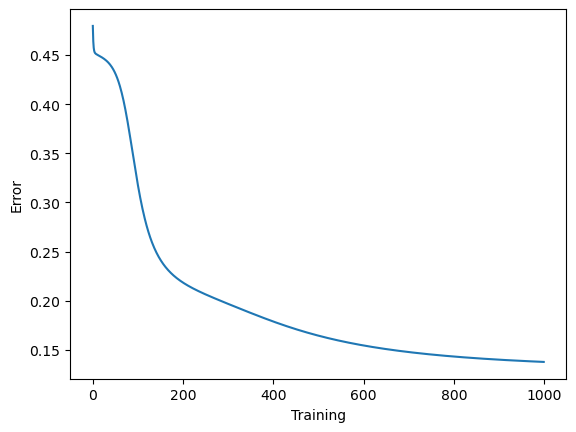

Training Accuracy 86.21%


In [30]:
#Plot the accuracy chart
accuracy = (1 - error) * 100

plt.plot(errors)
plt.xlabel('Training')
plt.ylabel('Error')
plt.show()
        
print("Training Accuracy " + str(round(accuracy,2)) + "%")

<font color='blue'>Cell 15
Running the evaluation function

In [34]:
y_pred = evaluation(trained_params,X_test)

<font color='blue'>Cell 16
Displaying the confusion matrix

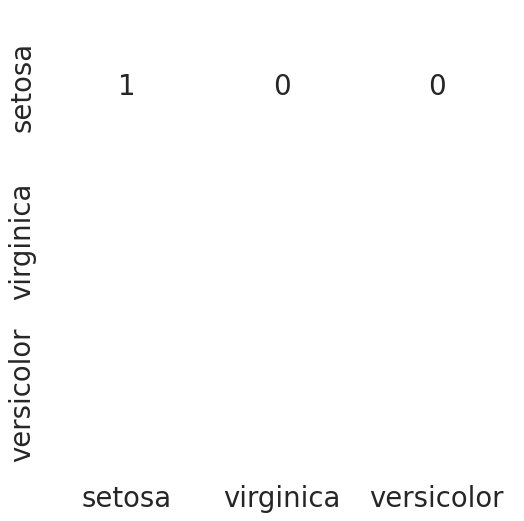

In [35]:
y_actual = pd.Series(y_test.argmax(axis=1))
y_pred = pd.Series(y_pred.argmax(axis=1))
cm = pd.crosstab(y_actual,y_pred).to_numpy()

if cm.shape[1]<3:
  cm = np.concatenate((cm,np.zeros((3,3-cm.shape[1]))),axis=1)

cm_norm = np.array([cm[i][j]/cm[i].sum() for i in range(cm.shape[0]) for j in range(cm.shape[1])])
cm_norm = cm_norm.reshape(3,3)


import seaborn as sns
from matplotlib.colors import ListedColormap


df_cm = pd.DataFrame(cm_norm, index = ['setosa','virginica','versicolor'],
                  columns = ['setosa','virginica','versicolor'])


plt.figure(figsize = (6,6))

with sns.axes_style('white'):
    sns.heatmap(df_cm,
                cbar=False,
                square=False,
                annot=True,
                annot_kws={"size": 20},
                cmap=ListedColormap(['white']),
                linewidths=0.5)
    sns.set(font_scale=1.8)

# Exercise 3.1

<font color='blue'>Cell 17
Function for testing flower dimensions

In [36]:

def input_test_seq():
    sepal_length = float(input('Enter the Sepal length in cm :'))
    while True:
        if float(sepal_length)< 0 or float(sepal_length) > 10:
            print('Inalid Entry. Enter Sepal Length <10 \n')
            sepal_length = float(input('Enter the sepal length in cm :'))
            continue
        else:
            break

    sepal_width = float(input('Enter the Sepal width in cm :'))
    while True:
        if float(sepal_width) < 0 or float(sepal_width) > 10:
            print('Invalid entry')
            sepal_width = float(input('Enter the sepal width in cm :'))
            continue
        else:
            break

    petal_length = float(input('Enter the petal length in cm :'))
    while True:
        if float(petal_length) <0 or float(petal_length) > 10:
            print('Inalid Entry. Please enter value less than 10')
            petal_length = float(input('Enter the petal length in cm :'))
            continue
        else:
            break

    petal_width = float(input('Enter the petal width in cm :'))
    while True:
        if float(petal_width) < 0 or float(petal_width) > 10:
            print('Invalid entry')
            petal_width = float(input('Enter the petal width in cm :'))
            continue
        else:
            break

    predict_features = [sepal_length,sepal_width,petal_length,petal_width]
    predict_features = normalize(predict_features)
    result_category = evaluation(trained_params,predict_features)
    result_category = result_category.argmax(axis=1)[0]

    if result_category == 0:
        value_prediction = "Iris-setosa"
    elif result_category == 1:
        value_prediction = "Iris-versicolor"
    elif result_category == 2:
        value_prediction = "Iris-virginica"
    return value_prediction

flower_prediction = input_test_seq()
print("The flower is most likely", flower_prediction)

The flower is most likely Iris-versicolor
